# 1 Prepare Work

In [1]:
import numpy as np
import os.path
import jieba
import pandas as pd
import re

In [2]:
csv_path = r'D:\Assignment\Project_01\newsdata.csv'
if not os.path.isfile(csv_path):
    print('Input error, please enter correct path!')
else:
    print('Success!')

Success!


In [3]:
ori_news_csv = pd.read_csv(csv_path, encoding='ansi', error_bad_lines=False, usecols=[0, 2, 3])

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
ori_news_csv.head()

,id,source,content
0,89617,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...
1,89616,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...
2,89615,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\n至于...
3,89614,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\n
4,89613,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\n@深圳交警微博称：昨日清晨交...


In [5]:
ori_news_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90532 entries, 0 to 90531
Data columns (total 3 columns):
id         90532 non-null object
source     89720 non-null object
content    87165 non-null object
dtypes: object(3)
memory usage: 2.1+ MB


In [6]:
ori_news_csv.describe()

,id,source,content
count,90532,89720,87165
unique,90428,1049,74995
top,",{""type"":""新闻""",新华社,\n\n
freq,32,78661,177


In [7]:
news_csv = ori_news_csv.dropna(axis=0)

In [8]:
news_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87163 entries, 0 to 90531
Data columns (total 3 columns):
id         87163 non-null object
source     87163 non-null object
content    87163 non-null object
dtypes: object(3)
memory usage: 2.7+ MB


In [9]:
news_csv[news_csv['source'].str.contains('新华')]

,id,source,content
3,89614,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\n
19,89600,新华网,国歌法草案首次提请最高立法机关审议\n点击图片进入下一页\n新闻：十二届全国人大常委会第二十...
27,89592,新华网,当地时间2017年6月17日，土耳其马尼萨省，在土耳其第1步兵训练大队司令部军营，590名土...
29,89590,新华网,英国与欧盟的“脱欧”谈判于19日正式开始。然而此时，英国首相特雷莎·梅正面临着空前的政治压力...
41,89578,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\n
53,89566,新华网,戈壁的大漠黄沙曾掩埋了无数西域古道，而如今一条大漠天路正顽强地与黄沙“搏斗”，在乌兰布和、腾...
67,89552,新华社@,从百度、支付宝到App?“高考志愿填报”五花八门\n顾女士近来减少了刷朋友圈的频率，一有时间...
97,89522,新华社,新华社韩国济州6月18日电综述：亚投行第二届年会三大亮点\n新华社记者 耿学鹏 严蕾\n亚洲...
106,89513,新华网,粤港澳概念板块午后走强，珠海港、恒基达鑫、白云机场等个股的午后纷纷快速拉升。\n据悉，首届粤...
115,89504,新华社,新华社北京6月18日电 经军委领导批准，《军营理论热点怎么看·2017》日前印发全军。\n为...


In [10]:
news_csv['is_xinhua'] = np.where(news_csv['source'].str.contains('新华'), 1, 0)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
news_csv.head()

,id,source,content,is_xinhua
0,89617,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,0
1,89616,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,0
2,89615,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\n至于...,0
3,89614,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\n,1
4,89613,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\n@深圳交警微博称：昨日清晨交...,0


## 2 Process Data

## 2.1 Get 1000 samples of '新华社' and 1000 samples of '非新华社' 

In [19]:
X = []
Y = []
i = 0
j = 0

In [20]:
content_list = news_csv['content'].tolist()
for k, boolean in enumerate(news_csv['is_xinhua']):
    if boolean == 1 and i < 2000:
        X.append(content_list[k])
        Y.append(1)
        i += 1
    elif boolean == 0 and j < 2000:
        X.append(content_list[k])
        Y.append(0)
        j += 1
    elif i >= 2000 and j >= 2000:
        break

In [21]:
len(X) 

4000

In [22]:
len(Y)

4000

## 2.2 Cut the samples

In [23]:
' '.join(jieba.cut(news_csv['content'][3]))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.148 seconds.
Prefix dict has been built succesfully.


'这是 6 月 18 日 在 葡萄牙 中部 大 佩德罗 冈 地区 拍摄 的 被 森林 大火 烧毁 的 汽车 。 新华社 记者 张立 云摄 \n'

In [24]:
def token(string):
    return ''.join(re.findall(r'[\w|\d]+', string))
def cut(string):
    return jieba.lcut(string)

In [25]:
cut_X = []

In [26]:
label = ['新华', '新华社', '新华网']
for news in X:
    tmp = cut(token(news))
    for word in tmp:
        if word in label:
            tmp.remove(word)
    cut_X.append(tmp)

In [27]:
len(cut_X)

4000

In [28]:
cut_X[3]

['这是',
 '6',
 '月',
 '18',
 '日',
 '在',
 '葡萄牙',
 '中部',
 '大',
 '佩德罗',
 '冈',
 '地区',
 '拍摄',
 '的',
 '被',
 '森林',
 '大火',
 '烧毁',
 '的',
 '汽车',
 '记者',
 '张立',
 '云摄']

# 3 Embdding

## 3.1 Get the probability

In [29]:
def memo(func):
    cache = {}

    def _wrap(*args): ## ? *args, **kwargs
        if args in cache: result = cache[args]
        else:
            result = func(*args)
            cache[args] = result
        return result
    return _wrap

In [30]:
@memo
def get_probability(word, model):
    keys = model.vocab.keys()
    total_words_count = sum([v.count for k, v in model.vocab.items()])
    esp = 1 / total_words_count

    if word in keys:
        word_count = model.vocab[word].count
        return word_count / total_words_count
    else:
        return esp

In [31]:
Word2vec_model_path = r'D:\Assignment\Assignment_08\X_Word2vec_model.w2v'

In [32]:
import gensim

D:\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [33]:
word2vec = gensim.models.word2vec.Word2Vec.load(Word2vec_model_path).wv

In [34]:
get_probability('啊', word2vec)

4.5954059429572944e-05

## 3.2 Get the SIF sentence embdding

In [35]:
from sklearn.decomposition import PCA

In [36]:
@memo
def get_SIF(word, model, a=0.01):
    return (a + get_probability(word, model))

In [37]:
def SIF_sentence_embdding(sentence, model, a=0.01):
    result = 0
    i = 0
    for word in sentence:
        temp = model[word] * get_SIF(word, model)
        result += temp
    return result

In [38]:
def PCA_SIF_sentence_embdding(news, model=word2vec, embedding_size=50, a=0.01):
    X = [SIF_sentence_embdding(sentence, model) for sentence in news]
    
    pca = PCA(n_components=min(embedding_size, len(X)))
    
    pca.fit(np.array(X))
    
    u = pca.components_[0]  # the PCA vector
    u = np.multiply(u, np.transpose(u))  # u x uT
    
    # pad the vector?  (occurs if we have less sentences than embeddings_size)
    if len(u) < embedding_size:
        for i in range(embedding_size - len(u)):
            u = np.append(u, 0)  # add needed extension for multiplication below
    # resulting sentence vectors, vs = vs -u x uT x vs
    Y = []
    for Vs in X:
        sub = np.multiply(u, Vs)
        Y.append(np.subtract(Vs, sub))
    return Y

In [39]:
len(cut_X)

4000

In [40]:
X = PCA_SIF_sentence_embdding(cut_X)

In [41]:
X[0]

array([-0.34104654,  0.31374547, -1.1811208 , -0.19859737, -0.7647337 ,
        0.77372706, -0.12509154, -0.04186025, -1.1469268 ,  1.3487879 ,
        0.7042195 , -0.02384785,  0.2330363 , -0.08122337, -0.06184241,
       -0.42905077,  0.85885626,  0.03325716,  0.44438314, -0.72827613,
       -0.42219204,  0.06383605, -0.04281656,  1.0301979 , -0.6999641 ,
       -0.40086344, -0.2073346 ,  0.8334558 , -0.1971911 , -0.84985775,
        0.48040995,  0.13200547, -0.00883819, -0.48485386, -0.7041102 ,
       -0.7435839 , -0.3604256 , -0.17174432,  0.40647677,  0.9483152 ,
        0.24558674,  0.19364677,  0.7387064 ,  0.8080554 ,  0.16495904,
       -0.18338598,  0.33867124, -0.10261573,  0.53504556,  0.495914  ],
      dtype=float32)

# 4 Model construction

## 4.1 Process data 

In [42]:
len(Y)

4000

In [43]:
X[0].shape

(50,)

In [44]:
X = np.array(X)

In [45]:
Y = np.array(Y)

In [46]:
X.shape

(4000, 50)

In [47]:
Y.shape

(4000,)

## 4.2 Get the train data and the test data

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
scaler = StandardScaler()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [53]:
X_tr_arr = X_train
X_ts_arr = X_test

In [54]:
print('Input Shape', (X_tr_arr.shape))
print('Output Shape', X_test.shape)

Input Shape (3200, 50)
Output Shape (800, 50)


In [55]:
print(y_train.shape)
print(y_test.shape)

(3200,)
(800,)


In [56]:
y_tr_arr = y_train
y_ts_arr = y_test

In [57]:
y_test

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,

## 4.3 Model construction

In [58]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

In [59]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [60]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

In [61]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [62]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

## 4.4 Executing the program

In [63]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [64]:
#Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0009,no_iterations=20000)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))
print('precision_score',precision_score(y_tr_pred.T, y_tr_arr))
print('recall_score',recall_score(y_tr_pred.T, y_tr_arr))
print('roc_auc_score',roc_auc_score(y_tr_pred.T, y_tr_arr))
#
print('\n')
y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))
print('precision_score',precision_score(y_tr_pred.T, y_tr_arr))
print('recall_score',recall_score(y_tr_pred.T, y_tr_arr))
print('roc_auc_score',roc_auc_score(y_tr_pred.T, y_tr_arr))

Number of Features 50


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


Optimized weights [[ 0.0780649  -0.2268933   0.0049131   0.36571982  0.02123218  0.08279435
   0.00113385  0.04477437  0.25542429 -0.25746399 -0.24891988 -0.60147754
   0.22167565  0.07946857  0.17220471 -0.56634145 -0.07274179  0.03644847
   0.15350634 -0.18002505 -0.19106773  0.02963644 -0.24727459  0.27397459
   0.16837279  0.18648159 -0.12804911  0.12717945 -0.30137593  0.22041983
  -0.10145527 -0.37241581  0.07369877  0.03379761  0.19500119  0.28848691
   0.26739483 -0.17565166  0.0039305   0.41973761 -0.38127139  0.42974294
   0.1848436  -0.15890321  0.29757476 -0.08005932  0.09994749  0.01998016
  -0.54562251  0.36283987]]
Optimized intercept -0.12925717045809754
Training Accuracy 0.915
precision_score 0.8993827160493827
recall_score 0.9303959131545338
roc_auc_score 0.9153203555980748


Test Accuracy 0.92375
precision_score 0.8993827160493827
recall_score 0.9303959131545338
roc_auc_score 0.9153203555980748


In [65]:
import matplotlib.pyplot as plt

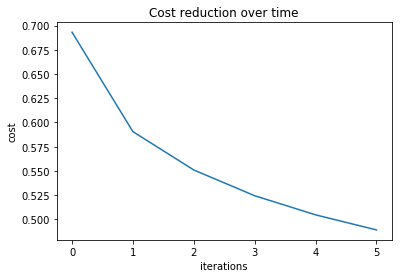

In [66]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title('Cost reduction over time')
plt.show()

# 5 Scikit-learn

In [67]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
def get_performance(clf, X_, y_):
    y_hat = clf.predict(X_)
    print('percision is: {}'.format(precision_score(y_, y_hat)))
    print('recall is: {}'.format(recall_score(y_, y_hat)))
    print('roc_auc is: {}'.format(roc_auc_score(y_, y_hat)))
    print('confusion matrix: \n{}'.format(confusion_matrix(y_, y_hat, labels=[0, 1])))

In [ ]:
X_train, X_test, y_train, y_test

In [70]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [71]:
get_performance(clf,X_train,y_train)
print('\n')
get_performance(clf,X_test,y_test)

percision is: 0.570975416336241
recall is: 0.8888888888888888
roc_auc is: 0.6020393811533051
confusion matrix: 
[[ 498 1082]
 [ 180 1440]]


percision is: 0.5493630573248408
recall is: 0.9078947368421053
roc_auc is: 0.6170426065162907
confusion matrix: 
[[137 283]
 [ 35 345]]


In [78]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(class_weight={0:1,1:1},criterion='entropy',max_features=50)
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 1}, criterion='entropy',
            max_depth=None, max_features=50, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [79]:
get_performance(clf_tree,X_train,y_train)
print('\n')
get_performance(clf_tree,X_test,y_test)

percision is: 1.0
recall is: 0.9993827160493827
roc_auc is: 0.9996913580246913
confusion matrix: 
[[1580    0]
 [   1 1619]]


percision is: 0.8538461538461538
recall is: 0.8763157894736842
roc_auc is: 0.8703007518796992
confusion matrix: 
[[363  57]
 [ 47 333]]
